In [28]:
! pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/0b/f8/b65cdd2be32e442c4efe7b672f73c90b05eab5a7f3f4115efe181d432c60/plotly-5.22.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/61/a1/6bb0cbebefb23641f068bb58a2bc56da9beb2b1c550242e3c540b37698f3/tenacity-8.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 1.4 MB/s eta 0:00:12
   ---------------------------------------- 0.1/16.4 MB 1.1 MB/s eta 0:00:15
   ---------------------------------------- 0.2/16.4 MB 1.0 MB/s eta 0:00:16
    --------------------------------------- 0.3/16.4 MB 1.4 MB/s eta 0:00:12
    --------------------------------------- 0.3/16.4 MB 1.4 MB/s eta 0:00:12
    --------------------------------------- 0.3/16.4 MB 1.4 MB/s eta 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
import pandas as pd
import datetime
from datetime import datetime, date

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import plotly.express as px
from matplotlib.gridspec import GridSpec


In [64]:
df = pd.read_excel('test_project.xlsx')

### Блок 1. Первичный анализ датасета

In [6]:
print('Кол-во строк: ', df.shape[0])
print('Кол-во столбцов: ', df.shape[1])

Кол-во строк:  26552
Кол-во столбцов:  5


In [4]:
# Первые 5 строк датасета
df.head()

,event_type,event_properties,platform,user_id,date_event
0,link_account_start,"{""network"": ""instagram""}",Android,732723.0,2024-04-01 00:00:20.072
1,email_confirmation_page,{},Android,732328.0,2024-04-01 00:00:27.667
2,view_signup_2_personal,{},Android,732724.0,2024-04-01 00:01:53.544
3,view_signup_2_personal,{},Android,732725.0,2024-04-01 00:02:07.050
4,view_signup_3_contact,{},Android,732724.0,2024-04-01 00:03:03.845


In [9]:
# Полная информация по каждому столбцу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_type        26552 non-null  object 
 1   event_properties  26552 non-null  object 
 2   platform          26552 non-null  object 
 3   user_id           26529 non-null  float64
 4   date_event        26552 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


Выводы по блоку 1:

1) Общее кол-во данных составляет 26552 строк и 5 столбцов

2) Данные не имеют пропуски, предобработка данных не требуется

### Блок 2. Дата и время

In [18]:
#datetime.datetime.strptime(df['date_event'].max(), '%Y-%m-%d %H:%M:%S.%f')
print(f"Минимальная дата и время: {df['date_event'].min()[0:-4]}") 
print(f"Максимальная дата и время: {df['date_event'].max()[0:-4]}")

Минимальная дата и время: 2024-04-01 00:00:20
Максимальная дата и время: 2024-04-10 23:56:37


<span style="color:red">
Все выводы и гипотезы представленные ниже сделаны на основе представленных данных (в период с 1 по 10 апреля)
</span>.

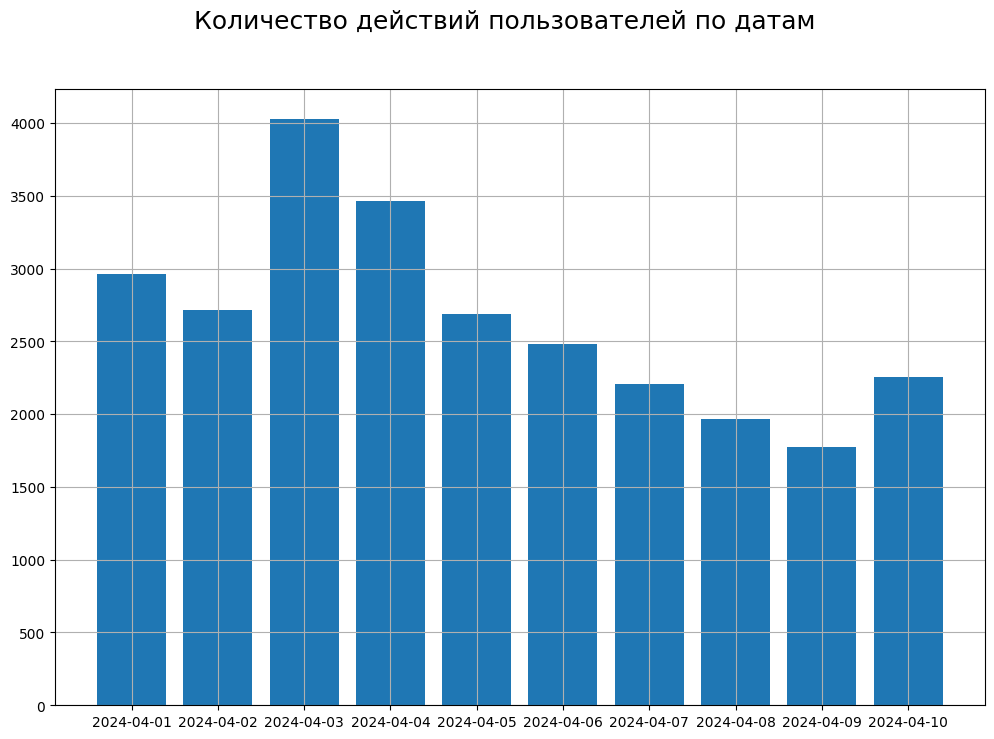

In [8]:
# Визуализация по количеству действий пользователей по датам
dates_df = df['date_event'].apply(lambda x: x[:10])

x = dates_df.groupby(dates_df).count()
y = dates_df.unique() 


fig = plt.figure(figsize=(12, 8))
fig.suptitle('Количество действий пользователей по датам', fontsize=18)
ax = fig.add_subplot()
 
#ax.hist(y)
ax.bar(y, x)
ax.grid()
 
plt.show()

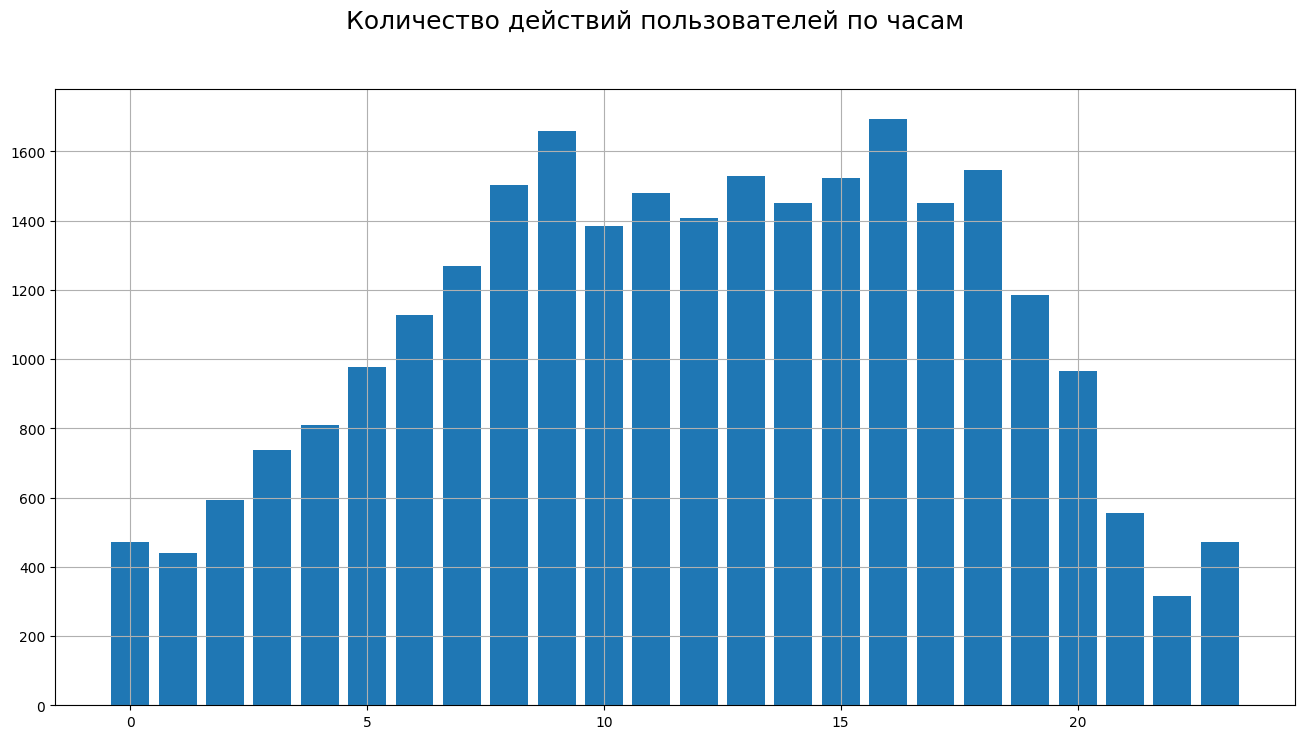

In [7]:
# Визуализация по количеству действий пользователей по часам
def times_count_event(date_event):
    hour_event = datetime.datetime.strptime(date_event, '%Y-%m-%d %H:%M:%S.%f').hour
    return hour_event

times_df = df['date_event'].apply(lambda x: times_count_event(x))

x = times_df.groupby(times_df).count()
y = times_df.unique() 


fig = plt.figure(figsize=(16, 8))
fig.suptitle('Количество действий пользователей по часам', fontsize=18)
ax = fig.add_subplot()
 
ax.bar(y, x)
ax.grid()
 
plt.show()

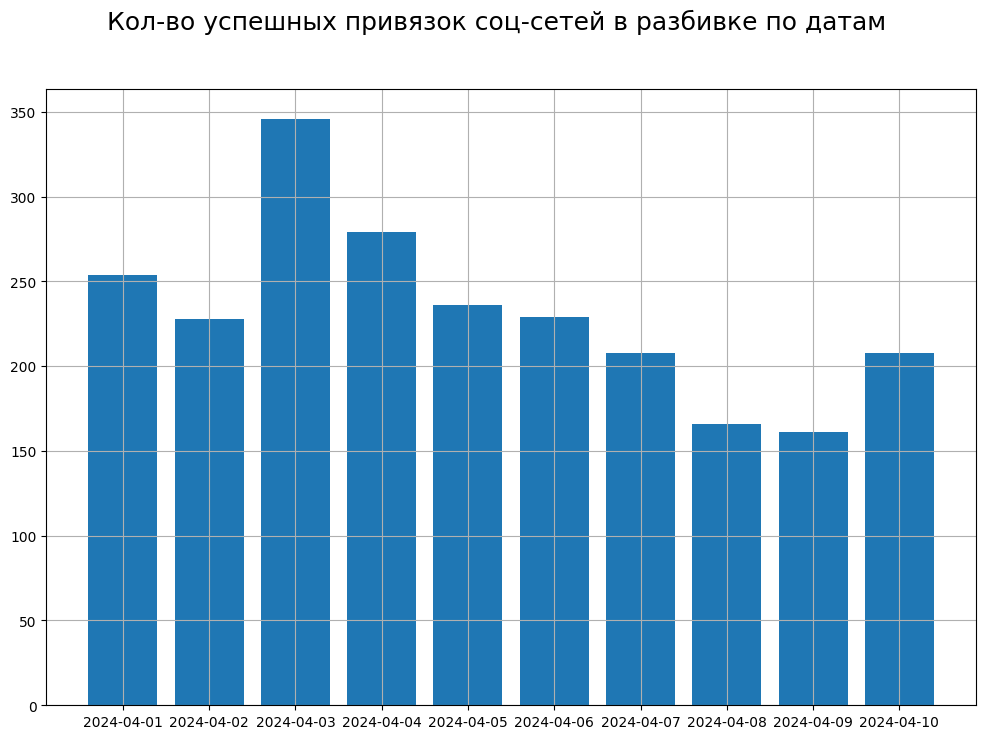

In [102]:
dates_df = df[df['event_type']=='link_account_success']['date_event'].apply(lambda x: x[:10])

x = dates_df.groupby(dates_df).count()
y = dates_df.unique() 


fig = plt.figure(figsize=(12, 8))
fig.suptitle('Кол-во успешных привязок соц-сетей в разбивке по датам', fontsize=18)
ax = fig.add_subplot()
 
#ax.hist(y)
ax.bar(y, x)
ax.grid()
 
plt.show()

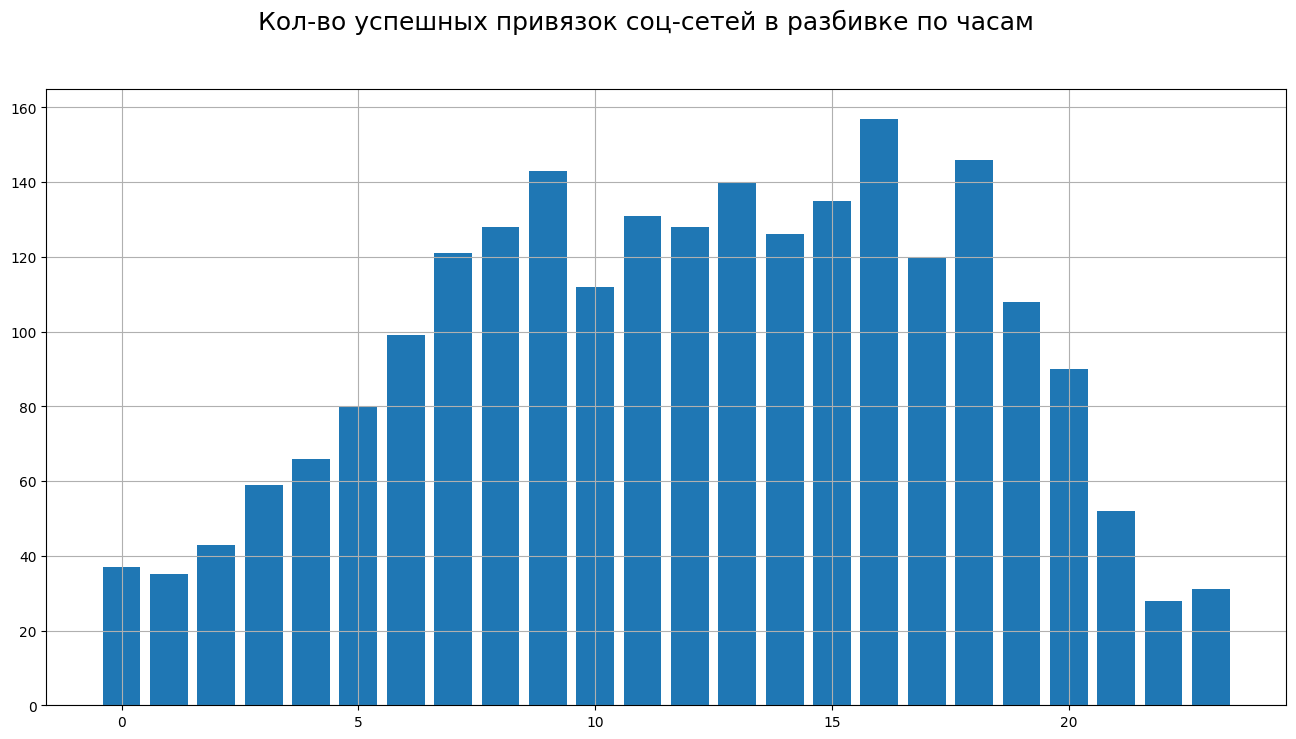

In [104]:
def times_count_event(date_event):
    hour_event = datetime.strptime(date_event, '%Y-%m-%d %H:%M:%S.%f').hour
    return hour_event

times_df = df[df['event_type']=='link_account_success']['date_event'].apply(lambda x: times_count_event(x))

x = times_df.groupby(times_df).count()
y = times_df.unique() 


fig = plt.figure(figsize=(16, 8))
fig.suptitle('Кол-во успешных привязок соц-сетей в разбивке по часам', fontsize=18)
ax = fig.add_subplot()
 
ax.bar(y, x)
ax.grid()
 
plt.show()

In [85]:
# Подсчет среднего времени успешной привязки соц-сети после начала привязки по всем юзерам
account_df = df[df['event_type'].isin(['link_account_success', 'link_account_start'])]
account_df = account_df.sort_values(['user_id', 'event_properties', 'date_event']).reset_index(drop=True)

account_success = account_df[account_df['event_type']=='link_account_success']
account_start = account_df.iloc[account_success.index-1]

account_success['data_start'] = list(account_start['date_event'])


def time_apply(dt):
    return datetime.strptime(dt, '%Y-%m-%d %H:%M:%S.%f')


account_success['dif_time'] = account_success.apply(
    lambda x: (time_apply(x['date_event']) - time_apply(x['data_start'])).total_seconds(),
        axis=1)

C:\Users\Александр Алейник\AppData\Local\Temp\ipykernel_20024\1432978550.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_success['data_start'] = list(account_start['date_event'])
C:\Users\Александр Алейник\AppData\Local\Temp\ipykernel_20024\1432978550.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_success['dif_time'] = account_success.apply(


In [99]:
time_dict = {'c':1, 'м':60, 'ч':3600}

for key, value in time_dict.items():
    print(f'Среднее кол-во времени привязки соц-сети({key}): \
{account_success['dif_time'].apply(lambda x: x/value).mean()}')

Среднее кол-во времени привязки соц-сети(c): 3680.506977105831
Среднее кол-во времени привязки соц-сети(м): 61.341782951763854
Среднее кол-во времени привязки соц-сети(ч): 1.0223630491960645


#### Выводы по блоку 2:

1) Данные находятся во временном диапазоне **с 1 по 10 апреля**.

2) Распределение всего кол-ва целевых действий и действий по успешной привязке      соц-сети юзерами имеет приблизительно одинаковое распределение.

3) Анализируя графики целевых действий по датам, можно предположить, что активность поользователей **падает в течении недели и резко возрастает в понедельник**.

4) Наблюдается низкая пользовательская активность **ночью и ранним утром**.

5) Время от начала привязки соц. сети до успешной привязки в среднем составляет **один час**

### Блок 3. ОС

([<matplotlib.patches.Wedge at 0x2c8067e6ed0>,
 [Text(-0.6462294179300218, 0.8901615243324243, 'Android'),
  Text(0.6462294179300216, -0.8901615243324245, 'iOS')],
 [Text(-0.35248877341637547, 0.4855426496358678, '70%'),
  Text(0.3524887734163754, -0.48554264963586785, '30%')])

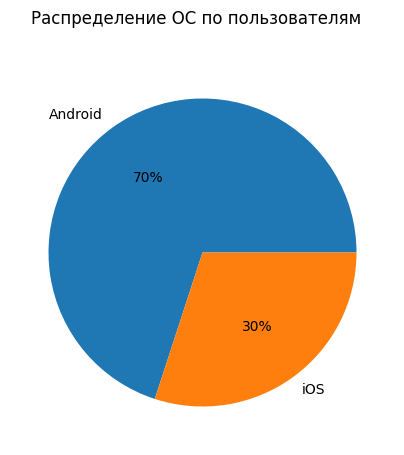

In [4]:
os_df = df[['user_id', 'platform']].drop_duplicates()
vals = os_df['platform'].value_counts().unique()
labels = os_df['platform'].value_counts().index

fig = plt.figure(figsize=(5,5))
fig.suptitle('Распределение ОС по пользователям')
ax = fig.add_subplot()
ax.pie(vals, labels=labels, autopct='%1.0f%%')

In [32]:
andr_user_all = len(df[df['platform']=='Android']['user_id'].unique())
andr_user_true = len(df[(df['platform']=='Android')\
                    & (df['event_type']=='link_account_success')]['user_id'].unique())

ios_user_all = len(df[df['platform']=='iOS']['user_id'].unique())
ios_user_true = len(df[(df['platform']=='iOS')\
                    & (df['event_type']=='link_account_success')]['user_id'].unique())


In [59]:
stages = ['Общее кол-во юзеров', 'Кол-во юзеров привязало соц. сеть']
df_android = pd.DataFrame(dict(number=[andr_user_all, andr_user_true], stage=stages))
df_android['OS'] = 'Android'
df_ios = pd.DataFrame(dict(number=[ios_user_all, ios_user_true], stage=stages))
df_ios['OS'] = 'IOS'
df_os = pd.concat([df_android, df_ios], axis=0)
fig = px.funnel(df_os, x='number', y='stage', color='OS', title='Воронка юзеров успешно привязавшых соц. сеть для разных ОС')
fig.show()

**Добавим в качестве шага для воронки пользователей, которые начинали привязывать соц-сети**

In [72]:
andr_user_all = len(df[df['platform']=='Android']['user_id'].unique())

andr_user_start = len(df[(df['platform']=='Android')\
                    & (df['event_type']=='link_account_start')]['user_id'].unique())

andr_user_true = len(df[(df['platform']=='Android')\
                    & (df['event_type']=='link_account_success')]['user_id'].unique())


ios_user_all = len(df[df['platform']=='iOS']['user_id'].unique())

ios_user_start = len(df[(df['platform']=='iOS')\
                    & (df['event_type']=='link_account_start')]['user_id'].unique())

ios_user_true = len(df[(df['platform']=='iOS')\
                    & (df['event_type']=='link_account_success')]['user_id'].unique())

In [73]:
stages = [
    'Общее кол-во юзеров',
    'Кол-во юзеров начинавших привязывать соц. сеть',
    'Кол-во юзеров привязало соц. сеть'
    ]

df_android = pd.DataFrame(dict(number=[andr_user_all, andr_user_start, andr_user_true], stage=stages))
df_android['OS'] = 'Android'
df_ios = pd.DataFrame(dict(number=[ios_user_all, ios_user_start, ios_user_true], stage=stages))
df_ios['OS'] = 'IOS'
df_os = pd.concat([df_android, df_ios], axis=0)
fig = px.funnel(df_os, x='number', y='stage', color='OS', title='Увеличенная воронка юзеров для разных ОС')
fig.show()

#### Выводы по блоку 3:

1) ОС представленные в датасете: аndroid и ios, относятся как **70:30** соответственно, с учетом того, что у пользователь может сидеть с нескольких устройств

2) Конверсия по кол-ву успешно привязанных соц.сетей **больше у пользователей операционной системы ios**

### Блок 4. Соц. сети

In [74]:
df = pd.read_excel('test_project.xlsx')

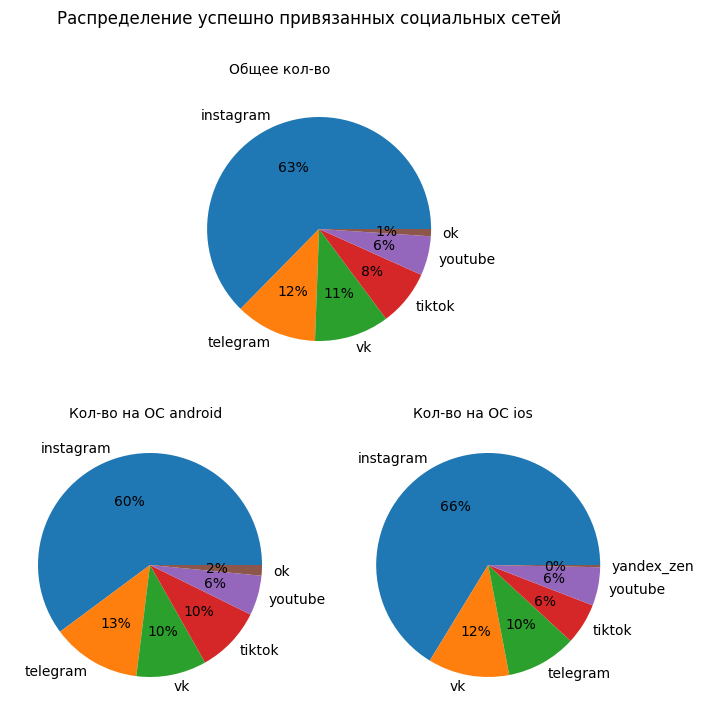

In [149]:
soc_net_os = df[df['event_type']=='link_account_success']['event_properties']\
        .apply(lambda x: x.split(':')[1][2:-2]).value_counts()[:-1]


soc_net_android = df[(df['event_type']=='link_account_success')\
                &(df['platform']=='Android')]['event_properties'].apply(
                    lambda x: x.split(':')[1][2:-2]
                ).value_counts()[:-1]


soc_net_ios = df[(df['event_type']=='link_account_success')\
                &(df['platform']=='iOS')]['event_properties'].apply(
                    lambda x: x.split(':')[1][2:-2]
                ).value_counts()[:-1]


fig = plt.figure(figsize=(8, 8))
fig.suptitle('Распределение успешно привязанных социальных сетей')
gs = GridSpec(ncols=2, nrows=2, figure=fig)


ax1 = plt.subplot(gs[0, :])
ax1.pie(soc_net_os.unique(), labels=soc_net_os.index, autopct='%1.0f%%')
plt.figtext(0.4, 0.9, 'Общее кол-во')
#ax1.title('das')
ax2 = fig.add_subplot(gs[1, 0])
ax2.pie(soc_net_android.unique(), labels=soc_net_android.index, autopct='%1.0f%%')
plt.figtext(0.2, 0.47, 'Кол-во на ОС android')
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(soc_net_ios.tolist(), labels=soc_net_ios.index, autopct='%1.0f%%')
plt.figtext(0.63, 0.47, 'Кол-во на ОС ios')

plt.show()

#### Выводы по блоку 4:

1) По больше части пользователи привязывают соц. сеть - instagram, также, среди пользователей, популярными являются: telegram, vk и tiktok